#TRassssssh

In [ ]:
import numpy as np
import math

# coordinates is a n by 2 array where the i'th entry is the coordinates of the i'th city [x, y]
# adjacency is a n by n array where the ij'th entry is the weight of the vector from city i to city j
# lam stands for lambda which is the number of cells in a row
# method should be 'sum' or 'mean'
# both of coordinates and adjacency are given as numpy arrays


def create_vectors(adjacency, coordinates, lam = 4, method='sum'):
  # finding the boundry of the coordinates
    min_map_x = np.min(coordinates[:, 0])
    max_map_x = np.max(coordinates[:, 0])
    min_map_y = np.min(coordinates[:, 1])
    max_map_y = np.max(coordinates[:, 1])

    lam = lam - 2
    # l is the lenght of a cell
    l = (max_map_x - min_map_x) / lam

    # n is the number of nodes
    n = len(adjacency)

    # width is the number of cells in a row
    # height is the number of cells in a coloumn
    width = lam + 2
    height = math.ceil((max_map_y - min_map_y) / l) + 2

    # vecs is the array such that its ij'th entry ([i, j]) is the vector ascociated with the center of the cell at row i and coloumn j
    vecs = np.zeros((width, height, 2))

    # num[i,j] = number of active outgoing vectors from center [i, j]
    num = np.zeros((width, height))

    exist_city = np.zeros((width, height))

    for i in range(n):
        # the i'th node is in the cell index by [p, q] where p and q are as follows:
        p = min(math.floor((coordinates[i][0] - min_map_x) / l) + 1, width - 2)
        q = min(math.floor((coordinates[i][1] - min_map_y) / l) + 1, height - 2)
        exist_city[p, q] = 1
        for j in range(n):
        # vector from city i to city j
            new_vec = coordinates[j] - coordinates[i]
            # adding new_vec with its weight starting from the correct cell
            vecs[p, q] += adjacency[i, j] * new_vec

        # there is a new nonzero vector outgoing from cell [p, q]
            if adjacency[i, j] != 0:
                num[p, q] += 1

    # if the method is mean, we devide the vector ascociated with center [p, q] by the number of active vectors from that cell
    if method == 'mean':
        for p in range(width):
            for q in range(height):
              if num[p,q] != 0:
                  vecs[p, q] = vecs[p, q] / num[p, q]

    new_coords = []
    new_vecs = []
    for p in range(width):
        for q in range(height):
          if exist_city[p,q] == 1:
              new_coords.append((p, q))
              new_vecs.append((vecs[p, q, 0], vecs[p, q, 1]))

    return new_coords, new_vecs



def initialize(coordinates, lam=4):#
    global h, w

    min_map_x = np.min(coordinates[:, 0])
    max_map_x = np.max(coordinates[:, 0])
    min_map_y = np.min(coordinates[:, 1])
    max_map_y = np.max(coordinates[:, 1])

    lam = lam - 2
    l = (max_map_x - min_map_x) / lam
    w = lam + 2
    h = math.ceil((max_map_y - min_map_y) / l) + 2



# make triangles
def interpolate(center, corners, vectors):
    d0 = np.cross(corners[1] - center, corners[2] - center) / np.linalg.norm(corners[1] - corners[2])
    d1 = np.cross(corners[0] - center, corners[2] - center) / np.linalg.norm(corners[0] - corners[2])
    d2 = np.cross(corners[1] - center, corners[0] - center) / np.linalg.norm(corners[1] - corners[0])

    if (d0 + d1 + d2 == 0):
        return np.array([0, 0])

    s = np.array([d0, d1, d2]) / (d0 + d1 + d2)
    return s[0] * vectors[0] + s[1] * vectors[1] + s[2] * vectors[2]

#find the vectors for all points (centers of the cell)
#function for one special field for example daily, monthly, seasonly
def find_field(coords, vecs):
    tri = Delaunay(coords)
    labels = tri.find_simplex(xy)
    vertices = tri.simplices
    rounds = vertices[labels]
    field = np.zeros((h, w, 2))
    for i in range(h):
        for j in range(w):
            field[i, j] = interpolate(xy[i, j], coords[rounds[i, j]], vecs[rounds[i, j]])
    return field


def add_corners(coords, vecs):
    coords = np.insert(coords, 0, [(0, 0), (0, w), (h, 0), (h, w)], axis=0)
    vecs = np.insert(vecs, 0, [(0, 0), (0, 0), (0, 0), (0, 0)], axis=0)
    return coords, vecs



def find_vector_field(coords, vecs):
    field = np.zeros((h, w, 2))
    coords, vecs = add_corners(coords, vecs)
    field = find_field(coords, vecs)
    return field





adjacency = np.array([[0,1,1,1],
                      [0,0,1,0],
                      [1,1,0,0],
                      [1,0,1,0]])
coordinates = np.array([[0,0], [1,0], [0,1], [1,1]])


initialize(coordinates, 4)
coords, vecs = create_vectors(adjacency, coordinates, 4, 'sum')
coords = np.array(coords)
vecs = np.array(vecs)

print(coords, vecs)




[[0 0]
 [0 4]
 [4 0]
 [4 4]
 [1 1]
 [1 2]
 [2 1]
 [2 2]] [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 2.  2.]
 [ 1. -2.]
 [-1.  1.]
 [-2. -1.]]


In [ ]:
adjacency = np.array([[0,1,1,1],
                      [0,0,1,0],
                      [1,1,0,0],
                      [1,0,1,0]])
coordinates = np.array([[0,0],[1,0],[0,1],[1,1]])
c, v = create_vectors(adjacency, coordinates, 4, 'sum')
print(c)
print(v)

[(1, 1), (1, 2), (2, 1), (2, 2)]
[(2.0, 2.0), (1.0, -2.0), (-1.0, 1.0), (-2.0, -1.0)]
[[ 2.  2.]
 [ 1. -2.]
 [-1.  1.]
 [-2. -1.]]


#Trash:

In [ ]:
def add_corners1(coords, vecs):
    coords = np.insert(coords, 0, [(0, 0), (0, w), (h, 0), (h, w)], axis=0)
    vecs = np.insert(vecs, 0, [[[0] * count] * 2] * 4, axis=0)
    return coords, vecs

#assign the vector to each city center
#centers: the coorrination of the center pof cities or microregions. for example file name: 'vector_center_city.txt'
def init_vecs1(centers, vectors):
    #centers:
    city_coords = np.loadtxt(centers)
    vecs = np.loadtxt(vectors)
    vecs = vecs.reshape((centers_count, 2, count))

    return city_coords, vecs

# make triangles
def interpolate(center, corners, vectors):
    d0 = np.cross(corners[1] - center, corners[2] - center) / np.linalg.norm(corners[1] - corners[2])
    d1 = np.cross(corners[0] - center, corners[2] - center) / np.linalg.norm(corners[0] - corners[2])
    d2 = np.cross(corners[1] - center, corners[0] - center) / np.linalg.norm(corners[1] - corners[0])

    if (d0 + d1 + d2 == 0):
        return np.array([0, 0])

    s = np.array([d0, d1, d2]) / (d0 + d1 + d2)
    return s[0] * vectors[0] + s[1] * vectors[1] + s[2] * vectors[2]

#find the vectors for all points (centers of the cell)
#function for one special field for example daily, monthly, seasonly
def find_field(city_coords, city_vecs):
    tri = Delaunay(city_coords)
    labels = tri.find_simplex(xy)
    vertices = tri.simplices
    rounds = vertices[labels]
    field = np.zeros((h, w, 2))
    for i in range(h):
        for j in range(w):
            field[i, j] = interpolate(xy[i, j], city_coords[rounds[i, j]], city_vecs[rounds[i, j]])
    return field

#find field for all 365 day/or 52-week/or 12-month
def find_vector_field(coords, vecs):
    field = np.zeros((h, w, 2))
    coords = add_corners1(coords, vecs)
    field = find_field(coords, vecs)
    return field



def initialize(coordinates, lam=4):#
    global h, w

    min_map_x = np.min(coordinates[:, 0])
    max_map_x = np.max(coordinates[:, 0])
    min_map_y = np.min(coordinates[:, 1])
    max_map_y = np.max(coordinates[:, 1])

    lam = lam - 2
    l = (max_map_x - min_map_x) / lam
    w = lam + 2
    h = math.ceil((max_map_y - min_map_y) / l) + 2

def load_fields(name):
    initialize()
    fields = np.loadtxt(name)
    fields = fields.reshape((count, h, w, 2))
    return fields

def start():
    initialize()

    coords, vecs = create_vectors(adjacency, coordinates, 4, 'sum')

    # find and saving fields
    # paramater1: geo coordination center.txt
    # paramater2: vectors.txt
    # paramater3: saved name of fields
    fields = find_vector_field(coords, vecs)

    # for loading fields and save time :)
    # paramater: name of saved field = paramater3 in previous
    # fields = load_fields('fields-mic.txt')
    # print('after loading')

    find_and_save_zeros(fields)


#start()

In [ ]:
def is_sink(jacob,threshold_jacob):
    trace = jacob[0, 0] + jacob[1, 1]
    det = jacob[0, 0] * jacob[1, 1] - jacob[0, 1] * jacob[1, 0]
    return trace > threshold_jacob and det > threshold_jacob


def jacobian(field, point):
    jacob = np.array([[0.0, 0.0], [0.0, 0.0]])
    x, y = point
    jacob[0, 0] = field[x + 1, y, 0] - field[x - 1, y, 0]
    jacob[1, 0] = field[x + 1, y, 1] - field[x - 1, y, 1]
    jacob[0, 1] = field[x, y + 1, 0] - field[x, y - 1, 0]
    jacob[1, 1] = field[x, y + 1, 1] - field[x, y - 1, 1]
    return jacob


def find_critical_points(field, threshold):
    magnitude = np.sqrt(field[:, :, 0]**2 + field[:, :, 1]**2)
    indices = np.where(magnitude[1:-1, 1:-1] < threshold)
    return np.dstack([indices[0], indices[1]])[0] + [1, 1]


def find_sinks(field):
    critical_points = find_critical_points(field, 1)
    sinks = []
    for point in critical_points:
        jacob = jacobian(field, point)
        if is_sink(jacob,0.01):
            sinks.append(point)
    return sinks

def is_source(jacob,threshold_jacob):
    trace = jacob[0, 0] + jacob[1, 1]
    det = jacob[0, 0] * jacob[1, 1] - jacob[0, 1] * jacob[1, 0]
    return trace < -threshold_jacob and det < -threshold_jacob

def find_sources(field):
    critical_points = find_critical_points(field, 1)
    sources = []
    for point in critical_points:
        jacob = jacobian(field, point)
        if is_source(jacob,0.01):
            sources.append(point)
    return sources



#find three structures: Repelling focus, Attracting focus, and center
def is_contour(jacob,threshold_jacob):
    trace = jacob[0, 0] + jacob[1, 1]
    det = jacob[0, 0] * jacob[1, 1] - jacob[0, 1] * jacob[1, 0]
    return trace*trace - 4*det < -threshold_jacob



def find_contours(field):
    critical_points = find_critical_points(field, 1)
    contours = []
    for point in critical_points:
        jacob = jacobian(field, point)
        if is_contour(jacob,0.01):
            contours.append(point)
    return contours

#New Codes:

In [1]:
import numpy as np
import math

# coordinates is a n by 2 array where the i'th entry is the coordinates of the i'th city [x, y]
# adjacency is a n by n array where the ij'th entry is the weight of the vector from city i to city j
# lam stands for lambda which is the number of cells in a row
# method should be 'sum' or 'mean'
# both of coordinates and adjacency are given as numpy arrays


def create_vectors(adjacency, coordinates, method='sum'):
    # n is the number of nodes
    n = len(adjacency)

    # vecs is the array such that its ij'th entry ([i, j]) is the vector ascociated with the center of the cell at row i and coloumn j
    vecs = np.zeros((n, 2))

    # num[i,j] = number of active outgoing vectors from center [i, j]
    num = np.zeros(n)

    for i in range(n):
      for j in range(n):
          # vector from city i to city j
          new_vec = coordinates[j] - coordinates[i]
          # adding new_vec with its weight starting from the correct cell
          vecs[i] += adjacency[i, j] * new_vec
          # there is a new nonzero vector outgoing from cell [p, q]
          if adjacency[i, j] != 0:
              num[i] += 1

    # if the method is mean, we devide the vector ascociated with center [p, q] by the number of active vectors from that cell
    if method == 'mean':
      for i in range(n):
        if num[i] != 0:
          vecs[i] = vecs[i] / num[i]

    return vecs

In [2]:
global xy
    idw = np.linspace(0, w - 1, w)
    idh = np.linspace(0, h - 1, h)
    y, x = np.meshgrid(idw, idh)
    x, y = x.astype(int), y.astype(int)
    xy = np.dstack([x, y])


IndentationError: unexpected indent (<ipython-input-2-975d7bfadce6>, line 2)

#Final

In [ ]:
pip install delaunay

In [ ]:
import numpy as np
import math
from scipy.spatial import Delaunay
import copy
import pandas as pd

# coordinates is a n by 2 array where the i'th entry is the coordinates of the i'th city [x, y]
# adjacency is a n by n array where the ij'th entry is the weight of the vector from city i to city j
# lam stands for lambda which is the number of cells in a row
# method should be 'sum' or 'mean'
# both of coordinates and adjacency are given as numpy arrays


def create_vectors(adjacency, coordinates, method='sum'):
    # n is the number of nodes
    n = len(adjacency)

    # vecs is the array such that its ij'th entry ([i, j]) is the vector ascociated with the center of the cell at row i and coloumn j
    vecs = np.zeros((w, h, 2))

    # num[i, j] = number of active outgoing vectors from center [i, j]
    weight = np.zeros((w, h))
    exist_node = np.zeros((w, h))

    for i in range(n):
        # the i'th node is in the cell index by [p, q] where p and q are as follows:
        p = min(math.floor((coordinates[i][0] - min_map_x) / l) + 1, w - 2)
        q = min(math.floor((coordinates[i][1] - min_map_y) / l) + 1, h - 2)
        exist_node[p, q] = 1
        for j in range(n):
        # vector from city i to city j
            new_vec = coordinates[j] - coordinates[i]
            # adding new_vec with its weight starting from the correct cell
            vecs[p, q] += adjacency[i, j] * new_vec

        # there is a new nonzero vector outgoing from cell [p, q]
            # if adjacency[i, j] != 0:
            weight[p, q] += adjacency[i, j]

    # if the method is mean, we devide the vector ascociated with center [p, q] by the number of active vectors from that cell
    if method == 'mean':
        for p in range(w):
            for q in range(h):
              if weight[p,q] != 0:
                  vecs[p, q] = vecs[p, q] / weight[p, q]

    new_coords = []
    new_vecs = []
    for p in range(w):
        for q in range(h):
          if exist_node[p, q] == 1:
              new_coords.append((p, q))
              new_vecs.append((vecs[p, q, 0], vecs[p, q, 1]))


    print(len(new_coords))
    return new_coords, new_vecs



def initialize(coordinates, lam=4):#
    global h, w, min_map_x, max_map_x, min_map_y, max_map_y, l

    min_map_x = np.min(coordinates[:, 0])
    max_map_x = np.max(coordinates[:, 0])
    min_map_y = np.min(coordinates[:, 1])
    max_map_y = np.max(coordinates[:, 1])

    lam = lam - 2
    l = (max_map_x - min_map_x) / lam
    w = lam + 2
    h = math.ceil((max_map_y - min_map_y) / l) + 2

    global xy

    idw = np.linspace(0, w - 1, w)
    idh = np.linspace(0, h - 1, h)
    y, x = np.meshgrid(idh, idw)
    x, y = x.astype(int), y.astype(int)
    xy = np.dstack([x, y])


    print(xy.shape)
    # print(xy[1,2][0])
    # print(xy)



# make triangles
def interpolate(center, corners, vectors):
    d0 = np.cross(corners[1] - center, corners[2] - center) / np.linalg.norm(corners[1] - corners[2])
    d1 = np.cross(corners[0] - center, corners[2] - center) / np.linalg.norm(corners[0] - corners[2])
    d2 = np.cross(corners[1] - center, corners[0] - center) / np.linalg.norm(corners[1] - corners[0])

    if (d0 + d1 + d2 == 0):
        return np.array([0, 0])

    s = np.array([d0, d1, d2]) / (d0 + d1 + d2)
    return s[0] * vectors[0] + s[1] * vectors[1] + s[2] * vectors[2]



#find the vectors for all points (centers of the cell)
#function for one special field for example daily, monthly, seasonly
def find_field(coords, vecs):
    tri = Delaunay(coords)
    labels = tri.find_simplex(xy)
    vertices = tri.simplices
    rounds = vertices[labels]
    field = np.zeros((w, h, 2))
    for i in range(w):
        for j in range(h):
            field[i, j] = interpolate(xy[i, j], coords[rounds[i, j]], vecs[rounds[i, j]])
    return field



def add_corners(coords, vecs):
    coords = np.insert(coords, 0, [(0, 0), (0, w), (h, 0), (h, w)], axis=0)
    vecs = np.insert(vecs, 0, [(0, 0), (0, 0), (0, 0), (0, 0)], axis=0)
    return coords, vecs



def find_vector_field(coords, vecs):
    field = np.zeros((h, w, 2))
    coords, vecs = add_corners(coords, vecs)
    field = find_field(coords, vecs)
    return field




def load_directed_network_as_adjacency_matrix(filename, node_list=None):
    # Load the edges and weights from the file
    edge_list = pd.read_csv(filename, delim_whitespace=True, header=None)

    # Get unique nodes (if not provided)
    if node_list is None:
        nodes = pd.unique(edge_list[[0, 1]].values.ravel('K'))
    else:
        nodes = node_list

    # Create a mapping from node names to indices
    node_map = {node: i for i, node in enumerate(nodes)}

    # Initialize adjacency matrix
    adj_matrix = np.zeros((len(nodes), len(nodes)))

    # Populate the adjacency matrix with weights (directed edges)
    for index, row in edge_list.iterrows():
        node1 = row[0]
        node2 = row[1]
        weight = row[2] if len(row) > 2 else 1  # Default weight to 1 if not provided
        adj_matrix[node_map[node1], node_map[node2]] = weight  # Directed edge

    return adj_matrix, node_map


# Example usage:
filename = 'gc_1_2013.txt'
adj_matrix, node_map = load_directed_network_as_adjacency_matrix(filename)


city_coords= np.loadtxt('vector_center_city (1).txt')
city_coords= city_coords[:824]

adjacency = copy.deepcopy(adj_matrix)
coordinates = copy.deepcopy(city_coords)




# adjacency = np.array([[0,1,1,1],
#                       [0,0,1,0],
#                       [1,1,0,0],
#                       [1,0,1,0]])
# coordinates = np.array([[0,0], [1,0], [0,1], [1,1]])



initialize(coordinates, 50)
coords, vecs = create_vectors(adjacency, coordinates, 'sum')
coords = np.array(coords)
vecs = np.array(vecs)

# print(coords)/
# print(vecs)

field = find_vector_field(coords, vecs)
# print(field)


<ipython-input-115-f9eb6481fef9>:136: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  edge_list = pd.read_csv(filename, delim_whitespace=True, header=None)


(50, 40, 2)
562


#Find Real Coordinates on Map

In [ ]:
real_coordinates = coords.copy().astype(float)
for i in range(len(real_coordinates)):
  x, y = real_coordinates[i]
  real_coordinates[i] = [x * l + min_map_x, y * l + min_map_y]


#Find Real Vector Field Inside The Map

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
mg_boundary= gpd.read_file('th878nx5786.shp')
polygon_boundry= mg_boundary['geometry'][0]

real_field = field.copy()

for i in range(len(field)):
  for j in range(len(field[0])):
    real_x = i * l + min_map_x # --> -46.2394723847
    real_y = j * l + min_map_y
    # print(real_x, real_y)?
    point = Point(real_x, real_y)
    if polygon_boundry.contains(point) is True:
      u, v = real_field[i, j]
      real_field[i, j] = [u * l, v * l]
    else:
      real_field[i, j] = [0, 0]

khar


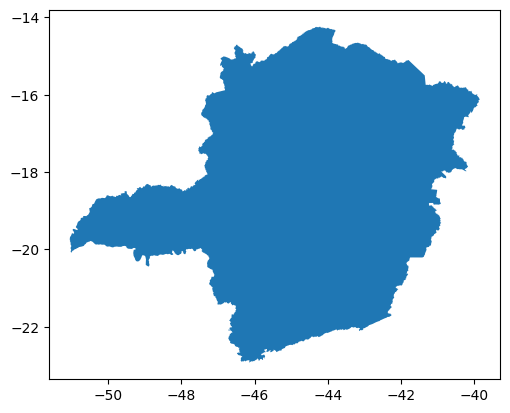

In [ ]:
mg_boundary.plot()
p = Point(-44, -21)
pp = Point(-21, -44)
if polygon_boundry.contains(p) is True:
  print('khar')

#Draw Field on Cells

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Get the grid for the vector field
X, Y = np.meshgrid(range(4), range(4))

# Extract U (x-component) and V (y-component) from the vector field
U = vecs[:, 0]
V = vecs[:, 1]

# Create the quiver plot
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, V, scale=1, units='xy')
# plt.xlim(-0.5, 3.5)
# plt.ylim(-0.5, 3.5)
plt.gca().set_aspect('equal')

# Display the plot
plt.title('Vector Field')
plt.show()


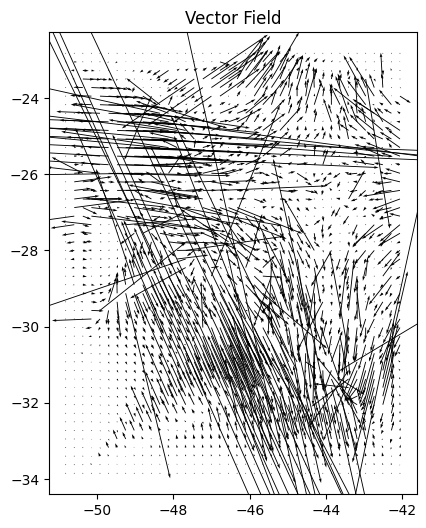

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the array with vectors
vector_field = field

# Get the grid for the vector field
# X, Y = np.meshgrid(range(vector_field.shape[1]), range(vector_field.shape[0]))

idw = np.linspace(0, w - 1, w)
idh = np.linspace(0, h - 1, h)
Y, X = np.meshgrid(idw, idh)
# X, Y = X.astype(int), Y.astype(int)
# xy = np.dstack([x, y])
X = X *l + min_map_x
Y = Y *l + min_map_y



# Extract U (x-component) and V (y-component) from the vector field
U = vector_field[:, :, 0]/100
V = vector_field[:, :, 1]/100

# Create the quiver plot
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, V, scale=1, units='xy')
# plt.xlim(-0.5, 3.5)
# plt.ylim(-0.5, 3.5)
plt.gca().set_aspect('equal')

# Display the plot
plt.title('Vector Field')
plt.show()

#Draw Streamline on Cells

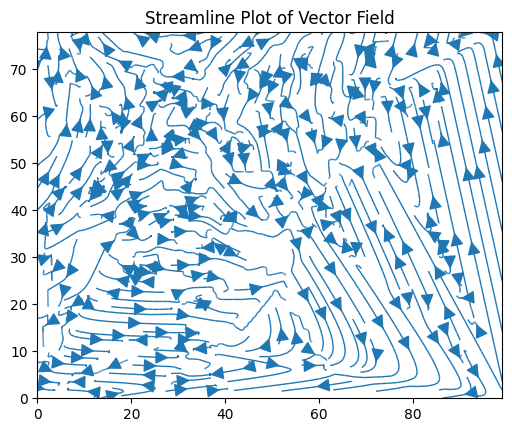

In [ ]:
# Get the grid for the vector field
X, Y = np.meshgrid(range(vector_field.shape[1]), range(vector_field.shape[0]))

# Extract U (x-component) and V (y-component) from the vector field
U = vector_field[:, :, 0]
V = vector_field[:, :, 1]

# Create the streamline plot
plt.figure(figsize=(6, 6))
plt.streamplot(X, Y, U, V, density=1.5, linewidth=1, arrowsize=2)
# plt.xlim(-0.5, 3.5)
# plt.ylim(-0.5, 3.5)
plt.gca().set_aspect('equal')

# Display the plot
plt.title('Streamline Plot of Vector Field')
plt.show()

#Draw Points on Cells Containing a Vector

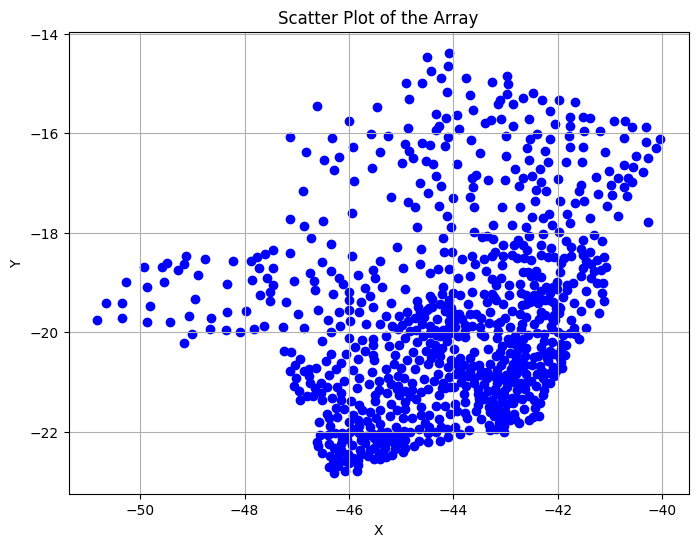

In [ ]:
import matplotlib.pyplot as plt
array= copy.deepcopy(coordinates)


# Extract the x and y coordinates
x = array[:, 0]  # First column for x-coordinates
y = array[:, 1]  # Second column for y-coordinates


# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', marker='o')


# Customize the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of the Array')


# Show the plot
plt.grid(True)
plt.show()


#Draw Points on Cells Containing a Vector

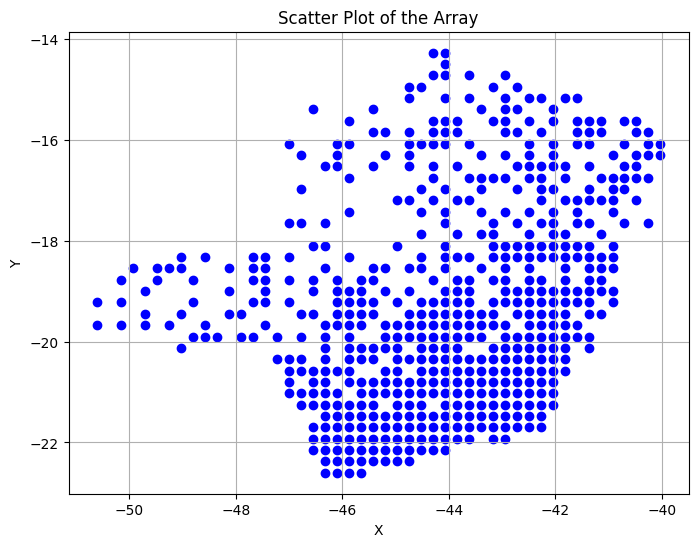

In [ ]:
import matplotlib.pyplot as plt
import copy
array= copy.deepcopy(real_coordinates)


# Extract the x and y coordinates
x = array[:, 0]  # First column for x-coordinates
y = array[:, 1]  # Second column for y-coordinates


# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', marker='o')


# Customize the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of the Array')


# Show the plot
plt.grid(True)
plt.show()


#Draw Real Field inside Map

This cell has error

In [ ]:
# Get the grid for the vector field

# xi, yi = np.linspace(min_map_x, max_map_x, w), np.linspace(min_map_y, max_map_y, h)
# X, Y = np.meshgrid(xi, yi)


idw = np.linspace(0, w - 1, w)
idh = np.linspace(0, h - 1, h)
Y, X = np.meshgrid(idh, idw)
# X, Y = X.astype(int), Y.astype(int)
# xy = np.dstack([x, y])
X = X * l + min_map_x
Y = Y * l + min_map_y

# print(X.shape)
# print(Y.shape)
# print(X)

# X, Y = np.meshgrid(range(real_field.shape[1]), range(real_field.shape[0]))

# Extract U (x-component) and V (y-component) from the vector field
U = real_field[:, :, 0]
V = real_field[:, :, 1]

# print(V.shape)

# Create the streamline plot
plt.figure(figsize=(6, 6))
plt.streamplot(X, Y, U, V, density=1.5, linewidth=1, arrowsize=2)
# plt.xlim(-0.5, 3.5)
# plt.ylim(-0.5, 3.5)
plt.gca().set_aspect('equal')

# Display the plot
plt.title('Streamline Plot of Vector Field')
plt.show()

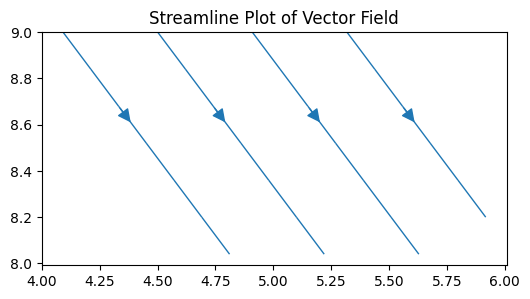

In [ ]:

X, Y = np.meshgrid(range(10), range(10))

# X, Y = np.meshgrid(range(real_field.shape[1]), range(real_field.shape[0]))


# Extract U (x-component) and V (y-component) from the vector field
fieldddd = np.zeros((10, 10, 2))
fieldddd[9, 5] = [3, -4]

U = fieldddd[:, :, 0]
V = fieldddd[:, :, 1]

# Create the streamline plot
plt.figure(figsize=(6, 6))
plt.streamplot(X, Y, U, V, density=1.5, linewidth=1, arrowsize=2)
# plt.xlim(-0.5, 3.5)
# plt.ylim(-0.5, 3.5)
plt.gca().set_aspect('equal')

# Display the plot
plt.title('Streamline Plot of Vector Field')
plt.show()

(50, 40, 2)


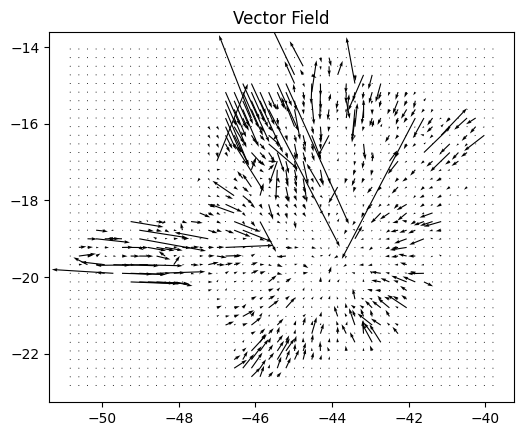

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the array with vectors

# Get the grid for the vector field
# X, Y = np.meshgrid(range(real_field.shape[1]) *l + min_map_x, range(real_field.shape[0])*l + min_map_y)


idw = np.linspace(0, w - 1, w)
idh = np.linspace(0, h - 1, h)
Y, X = np.meshgrid(idh, idw)
# X, Y = X.astype(int), Y.astype(int)
# xy = np.dstack([x, y])
X = X * l + min_map_x
Y = Y * l + min_map_y



print(real_field.shape)

# Extract U (x-component) and V (y-component) from the vector field
U = real_field[:, :, 0] / 50
V = real_field[:, :, 1] / 50

# Create the quiver plot
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, V, scale=1, units='xy')
# plt.xlim(-0.5, 3.5)
# plt.ylim(-0.5, 3.5)
plt.gca().set_aspect('equal')

# Display the plot
plt.title('Vector Field')
plt.show()


40
50
(40, 50)


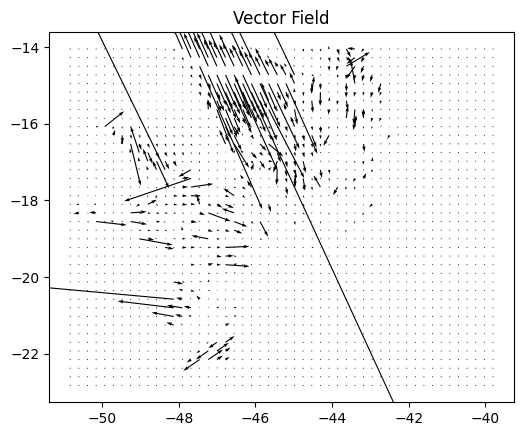

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the array with vectors

print(real_field.shape[0])

print(real_field.shape[1])


# Get the grid for the vector field
X, Y = np.meshgrid(range(real_field.shape[1]) * l + min_map_x, range(real_field.shape[0])* l + min_map_y)

print(X.shape)

# Extract U (x-component) and V (y-component) from the vector field
U = real_field[:, :, 0] / 100
V = real_field[:, :, 1] / 100

# Create the quiver plot
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, V, scale=1, units='xy')
# plt.xlim(-0.5, 3.5)
# plt.ylim(-0.5, 3.5)
plt.gca().set_aspect('equal')

# Display the plot
plt.title('Vector Field')
plt.show()


In [ ]:
def map_to_numpy(points):
    initialize_transform(h , w)
    res = points.copy()
    x_map, y_map = res[:,0], res[:,1]
    x_map = x_map - min_map_x
    y_map = y_map - min_map_y
    normalized_x = x_map / w # from 0 to 1 west to east
    normalized_y = y_map / h # from 0 to 1 south to north
    y_numpy = normalized_x * w
    x_numpy = (1 - normalized_y) * h
    return np.dstack([x_numpy, y_numpy])[0]#.ast



(50, 40, 2)


ValueError: The rows of 'x' must be equal

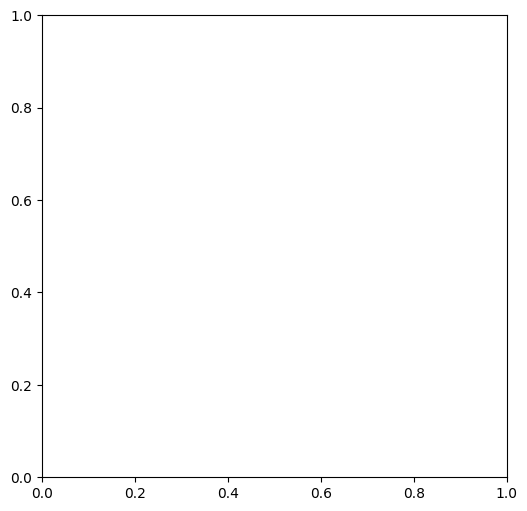

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the array with vectors

# Get the grid for the vector field
# X, Y = np.meshgrid(range(real_field.shape[1]) *l + min_map_x, range(real_field.shape[0])*l + min_map_y)


idw = np.linspace(0, w - 1, w)
idh = np.linspace(0, h - 1, h)
Y, X = np.meshgrid(idh, idw)
# X, Y = X.astype(int), Y.astype(int)
# xy = np.dstack([x, y])
X = X * l + min_map_x
Y = Y * l + min_map_y



print(real_field.shape)

# Extract U (x-component) and V (y-component) from the vector field
U = real_field[:, :, 0] / 50
V = real_field[:, :, 1] / 50

# Create the quiver plot
plt.figure(figsize=(6, 6))
plt.streamplot(X, Y, U, V, density=1.5)
# plt.xlim(-0.5, 3.5)
# plt.ylim(-0.5, 3.5)
plt.gca().set_aspect('equal')

# Display the plot
plt.title('Vector Field')
plt.show()


(50, 40, 2)


ValueError: The rows of 'x' must be equal

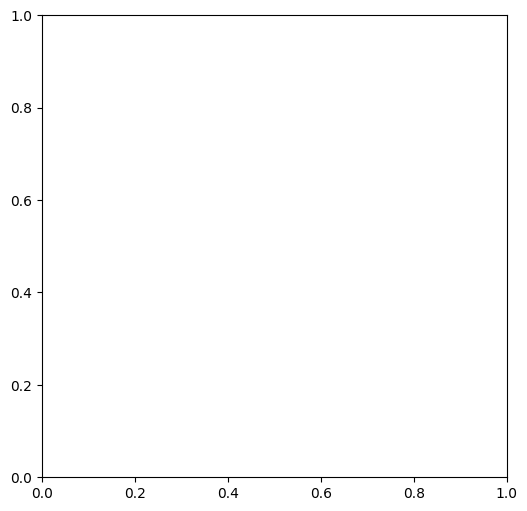

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the array with vectors
# You should have 'real_field' already defined with the shape (height, width, 2)
# with '2' representing the x and y components of the vector at each point.

# Get the grid for the vector field
# idw, idh should match the dimensions of 'real_field'

idw = np.linspace(0, w - 1, w)  # horizontal grid
idh = np.linspace(0, h - 1, h)  # vertical grid
Y, X = np.meshgrid(idh, idw)  # Create the mesh grid

# Scale the grid based on 'l', 'min_map_x', and 'min_map_y'
# X = X * l + min_map_x
# Y = Y * l + min_map_y

# Print the shape of the real field for debugging
print(real_field.shape)

# Extract U (x-component) and V (y-component) from the vector field
U = real_field[:, :, 0] / 50  # Normalizing U
V = real_field[:, :, 1] / 50  # Normalizing V

# Create the streamline plot
plt.figure(figsize=(6, 6))
plt.streamplot(X, Y, U, V, density=1.5, color=np.sqrt(U**2 + V**2), cmap='cool')

# Set axis limits and aspect ratio
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())
plt.gca().set_aspect('equal')

# Add a title and show the plot
plt.title('Streamline of Vector Field')
plt.colorbar(label='Velocity Magnitude')  # Colorbar to show velocity magnitude
plt.show()




#Finallllllll

In [ ]:
pip install delaunay

<ipython-input-144-21538b436c61>:144: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  edge_list = pd.read_csv(filename, delim_whitespace=True, header=None)


(60, 48, 2)
662


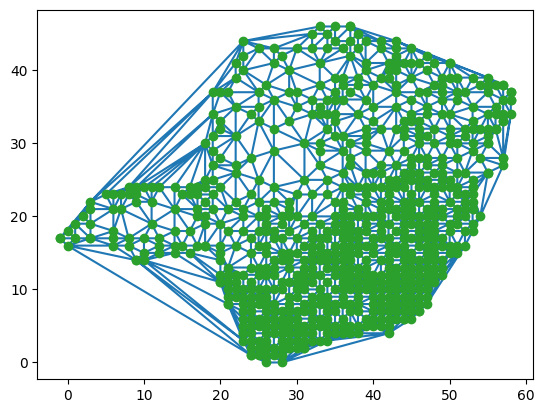

In [ ]:
import numpy as np
import math
from scipy.spatial import Delaunay
import copy
import pandas as pd

# coordinates is a n by 2 array where the i'th entry is the coordinates of the i'th city [x, y]
# adjacency is a n by n array where the ij'th entry is the weight of the vector from city i to city j
# lam stands for lambda which is the number of cells in a row
# method should be 'sum' or 'mean'
# both of coordinates and adjacency are given as numpy arrays


def create_vectors(adjacency, coordinates, method='sum'):
    # n is the number of nodes
    n = len(adjacency)

    # vecs is the array such that its ij'th entry ([i, j]) is the vector ascociated with the center of the cell at row i and coloumn j
    vecs = np.zeros((w, h, 2))

    # num[i, j] = number of active outgoing vectors from center [i, j]
    weight = np.zeros((w, h))
    exist_node = np.zeros((w, h))

    for i in range(n):
        # the i'th node is in the cell index by [p, q] where p and q are as follows:
        p = min(math.floor((coordinates[i][0] - min_map_x) / l) + 1, w - 2)
        q = min(math.floor((coordinates[i][1] - min_map_y) / l) + 1, h - 2)
        exist_node[p, q] = 1
        for j in range(n):
        # vector from city i to city j
            new_vec = coordinates[j] - coordinates[i]
            # adding new_vec with its weight starting from the correct cell
            vecs[p, q] += adjacency[i, j] * new_vec

        # there is a new nonzero vector outgoing from cell [p, q]
            # if adjacency[i, j] != 0:
            weight[p, q] += adjacency[i, j]

    # if the method is mean, we devide the vector ascociated with center [p, q] by the number of active vectors from that cell
    if method == 'mean':
        for p in range(w):
            for q in range(h):
              if weight[p,q] != 0:
                  vecs[p, q] = vecs[p, q] / weight[p, q]

    new_coords = []
    new_vecs = []
    for p in range(w):
        for q in range(h):
          if exist_node[p, q] == 1:
              new_coords.append((p, q))
              new_vecs.append((vecs[p, q, 0], vecs[p, q, 1]))


    print(len(new_coords))
    return new_coords, new_vecs



def initialize(coordinates, lam=4):#
    global h, w, min_map_x, max_map_x, min_map_y, max_map_y, l

    min_map_x = np.min(coordinates[:, 0])
    max_map_x = np.max(coordinates[:, 0])
    min_map_y = np.min(coordinates[:, 1])
    max_map_y = np.max(coordinates[:, 1])

    lam = lam - 2
    l = (max_map_x - min_map_x) / lam
    w = lam + 2
    h = math.ceil((max_map_y - min_map_y) / l) + 2

    global xy

    idw = np.linspace(0, w - 1, w)
    idh = np.linspace(0, h - 1, h)
    y, x = np.meshgrid(idh, idw)
    x, y = x.astype(int), y.astype(int)
    xy = np.dstack([x, y])


    print(xy.shape)
    # print(xy[1,2][0])
    # print(xy)



# make triangles
def interpolate(center, corners, vectors):
    d0 = np.cross(corners[1] - center, corners[2] - center) / np.linalg.norm(corners[1] - corners[2])
    d1 = np.cross(corners[0] - center, corners[2] - center) / np.linalg.norm(corners[0] - corners[2])
    d2 = np.cross(corners[1] - center, corners[0] - center) / np.linalg.norm(corners[1] - corners[0])

    if (d0 + d1 + d2 == 0):
        return np.array([0, 0])

    s = np.array([d0, d1, d2]) / (d0 + d1 + d2)
    return s[0] * vectors[0] + s[1] * vectors[1] + s[2] * vectors[2]



#find the vectors for all points (centers of the cell)
#function for one special field for example daily, monthly, seasonly
def find_field(coords, vecs):
    tri = Delaunay(coords)


    # # Plot the result
    plt.triplot(coords[:, 0], coords[:, 1], tri.simplices)
    plt.plot(coords[:, 0], coords[:, 1], 'o')
    plt.show()



    labels = tri.find_simplex(xy)
    vertices = tri.simplices
    rounds = vertices[labels]
    field = np.zeros((w, h, 2))
    for i in range(w):
        for j in range(h):
            field[i, j] = interpolate(xy[i, j], coords[rounds[i, j]], vecs[rounds[i, j]])
    return field



def add_corners(coords, vecs):
    coords = np.insert(coords, 0, [(0, 0), (0, w), (h, 0), (h, w)], axis=0)
    vecs = np.insert(vecs, 0, [(0, 0), (0, 0), (0, 0), (0, 0)], axis=0)
    return coords, vecs



def find_vector_field(coords, vecs):
    # coords, vecs = add_corners(coords, vecs)
    field = find_field(coords, vecs)
    return field




def load_directed_network_as_adjacency_matrix(filename, node_list=None):
    # Load the edges and weights from the file
    edge_list = pd.read_csv(filename, delim_whitespace=True, header=None)

    # Get unique nodes (if not provided)
    if node_list is None:
        nodes = pd.unique(edge_list[[0, 1]].values.ravel('K'))
    else:
        nodes = node_list

    # Create a mapping from node names to indices
    node_map = {node: i for i, node in enumerate(nodes)}

    # Initialize adjacency matrix
    adj_matrix = np.zeros((len(nodes), len(nodes)))

    # Populate the adjacency matrix with weights (directed edges)
    for index, row in edge_list.iterrows():
        node1 = row[0]
        node2 = row[1]
        weight = row[2] if len(row) > 2 else 1  # Default weight to 1 if not provided
        adj_matrix[node_map[node1], node_map[node2]] = weight  # Directed edge

    return adj_matrix, node_map





# Example usage:
filename = 'gc_1_2013.txt'
adj_matrix, node_map = load_directed_network_as_adjacency_matrix(filename)


city_coords= np.loadtxt('vector_center_city (1).txt')
city_coords= city_coords[:824]

adjacency = copy.deepcopy(adj_matrix)
coordinates = copy.deepcopy(city_coords)




# add_boundry(coords, vecs, points_list)






# adjacency = np.array([[0,1,1,1],
#                       [0,0,1,0],
#                       [1,1,0,0],
#                       [1,0,1,0]])
# coordinates = np.array([[0,0], [1,0], [0,1], [1,1]])



initialize(coordinates, 60)
coords, vecs = create_vectors(adjacency, coordinates, 'sum')
coords = np.array(coords)
vecs = np.array(vecs)





import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# Step 1: Load the shapefile
gdf = gpd.read_file('th878nx5786.shp')

# Assuming there's only one geometry in the GeoDataFrame
geometry = gdf.geometry.iloc[0]

# Step 2: Extract the boundary of the geometry
boundary = geometry.boundary

# Step 3: Get the total length of the boundary
boundary_length = boundary.length

# Step 4: Generate 100 evenly spaced distances along the boundary
distances = np.linspace(0, boundary_length, 100)

# Step 5: Sample 100 points along the boundary
points = [boundary.interpolate(distance) for distance in distances]

# Step 6: Create a list of (x, y) coordinate tuples
points_list = [(point.x, point.y) for point in points]





for p in points_list:
  cell_x = min(math.floor((p[0] - min_map_x) / l) + 1, w - 2)
  cell_y = min(math.floor((p[1] - min_map_y) / l) + 1, h - 2)
  coords = np.append(coords, [[cell_x, cell_y]], axis=0)
  vecs = np.append(vecs, [[0, 0]], axis=0)



# print(len(coords))
# print(len(vecs))

# print(len(points_list))

# print(len(coords))
# print(len(vecs))





# print(coords)/
# print(vecs)

field = find_vector_field(coords, vecs)
# print(field)



real_coordinates = coords.copy().astype(float)
for i in range(len(real_coordinates)):
  x, y = real_coordinates[i]
  real_coordinates[i] = [x * l + min_map_x, y * l + min_map_y]



from shapely.geometry import Point
import geopandas as gpd
mg_boundary= gpd.read_file('th878nx5786.shp')
polygon_boundry= mg_boundary['geometry'][0]

real_field = field.copy()

for i in range(len(field)):
  for j in range(len(field[0])):
    real_x = i * l + min_map_x # --> -46.2394723847
    real_y = j * l + min_map_y
    # print(real_x, real_y)?
    point = Point(real_x, real_y)
    if polygon_boundry.contains(point) is True:
      u, v = real_field[i, j]
      real_field[i, j] = [u * l, v * l]
    else:
      real_field[i, j] = [0, 0]




(60, 48, 2)


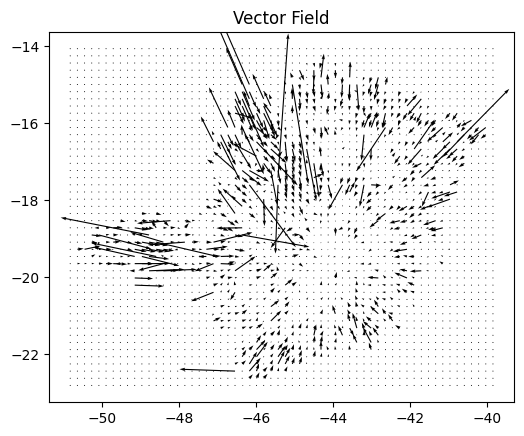

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the array with vectors

# Get the grid for the vector field
# X, Y = np.meshgrid(range(real_field.shape[1]) *l + min_map_x, range(real_field.shape[0])*l + min_map_y)


idw = np.linspace(0, w - 1, w)
idh = np.linspace(0, h - 1, h)
Y, X = np.meshgrid(idh, idw)
# X, Y = X.astype(int), Y.astype(int)
# xy = np.dstack([x, y])
X = X * l + min_map_x
Y = Y * l + min_map_y



print(real_field.shape)

# Extract U (x-component) and V (y-component) from the vector field
U = real_field[:, :, 0] / 50
V = real_field[:, :, 1] / 50

# Create the quiver plot
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, V, scale=1, units='xy')
# plt.xlim(-0.5, 3.5)
# plt.ylim(-0.5, 3.5)
plt.gca().set_aspect('equal')

# Display the plot
plt.title('Vector Field')
plt.show()


In [ ]:
def find_n_points_on_boundry(gdf, n=100):
    # Step 1: Load the shapefile
    #gdf = gpd.read_file('th878nx5786.shp')

    # Assuming there's only one geometry in the GeoDataFrame
    geometry = gdf.geometry.iloc[0]

    # extract the boundary of the geometry
    boundary = geometry.boundary

    #get the total length of the boundary
    boundary_length = boundary.length

    #generate 100 evenly spaced distances along the boundary
    distances = np.linspace(0, boundary_length, n)

    #Sample n points along the boundary
    points = [boundary.interpolate(distance) for distance in distances]

    #Create a list of (x, y) coordinate tuples
    points_list = [(point.x, point.y) for point in points]
    
    return points_list
    
    
def add_boundry_points_to_coords_vecs(coords, vecs, points_list):
    #make an array from coords and vecs
    coords = np.array(coords)
    vecs = np.array(vecs)
    
    for p in points_list:
        cell_x = min(math.floor((p[0] - min_map_x) / l) + 1, w - 2)
        cell_y = min(math.floor((p[1] - min_map_y) / l) + 1, h - 2)
        coords = np.append(coords, [[cell_x, cell_y]], axis=0)
        vecs = np.append(vecs, [[0, 0]], axis=0)
        
        
    return coords, vecs
        
        
    

# create vector for all locations and interpolate only for the location with zero vector

In [20]:
import numpy as np
import math
from scipy.spatial import Delaunay
import copy
import pandas as pd
import pickle
import geopandas as gpd
import matplotlib.pyplot as plt

In [55]:


def create_vectors(adjacency, coordinates, method='sum'):
    """
    Create vectors for each location using adjacency matrix.

    Parameters:
        adjacency (ndarray): Adjacency matrix (n x n).
        coordinates (ndarray): Coordinate points (n x 2).
        method (str): 'sum' (default) or 'mean' for vector calculation.

    Returns:
        ndarray: Computed vectors (n x 2).
    """
    n = len(adjacency)
    vecs = np.zeros((n, 2))
    weight = np.zeros(n)

    for i in range(n):
        for j in range(n):
            new_vec = coordinates[j] - coordinates[i]
            vecs[i] += adjacency[i, j] * new_vec
            weight[i] += adjacency[i, j]

    if method == 'mean':
        for i in range(n):
            if weight[i] != 0:
                vecs[i] = vecs[i] / weight[i]

    return vecs

def initialize(coordinates, lam=4):# lam is the scale you are interested in to have (number od cell in each dimention)
    global h, w, min_map_x, max_map_x, min_map_y, max_map_y, l

    min_map_x = np.min(coordinates[:, 0])
    max_map_x = np.max(coordinates[:, 0])
    min_map_y = np.min(coordinates[:, 1])
    max_map_y = np.max(coordinates[:, 1])

    lam = lam - 2
    l = (max_map_x - min_map_x) / lam
    w = lam + 2
    h = math.ceil((max_map_y - min_map_y) / l) + 2

    global xy

    idw = np.linspace(0, w - 1, w)
    idh = np.linspace(0, h - 1, h)
    y, x = np.meshgrid(idh, idw)
    x, y = x.astype(int), y.astype(int)
    xy = np.dstack([x, y])


    print(xy.shape)
    
    
def find_n_points_on_boundry(gdf, n=100):
    #Load the shapefile
    #gdf = gpd.read_file('th878nx5786.shp')

    #assuming there's only one geometry in the GeoDataFrame
    geometry = gdf.geometry.iloc[0]

    boundary = geometry.boundary
    boundary_length = boundary.length

    distances = np.linspace(0, boundary_length, n)

    #generate n points along the boundary
    points = [boundary.interpolate(distance) for distance in distances]
    points_list = [(point.x, point.y) for point in points]
    
    return points_list
    
    
def add_boundry_points_to_coords_vecs(coords, vecs, points_list):
    
    #make an array from coords and vecs
    coords = np.array(coords)
    vecs = np.array(vecs)
    
    for p in points_list:
        #cell_x = min(math.floor((p[0] - min_map_x) / l) + 1, w - 2)
        #cell_y = min(math.floor((p[1] - min_map_y) / l) + 1, h - 2)
        coords = np.append(coords, [[p[0], p[1]]], axis=0)
        vecs = np.append(vecs, [[0, 0]], axis=0)
        
        
    return coords, vecs

"""def interpolate_zero_vectors(coordinates, vecs, point_list):
   
    Interpolates missing vectors using Delaunay triangulation, ensuring points in `point_list` remain unchanged.

    Parameters:
        coordinates (ndarray): Coordinate points (n x 2).
        vecs (ndarray): Computed vectors (n x 2).
        point_list (ndarray): Array of coordinates that should NOT be interpolated.

    Returns:
        ndarray: Updated vectors with interpolated values.
    
  # Convert point_list to a set of tuples for easy lookup
  point_set = {tuple(point) for point in point_list}

    # Identify zero vectors that are NOT in point_list
    zero_vec_indices = [i for i in range(len(vecs)) if np.all(vecs[i] == 0) and tuple(coordinates[i]) not in point_set]

    # Apply Delaunay triangulation
    tri = Delaunay(coordinates)

    for i in zero_vec_indices:
        simplex_idx = tri.find_simplex(coordinates[i])

        if simplex_idx == -1:
            continue  # Skip if point is outside triangulation
        
        # Get the indices of the triangle's vertices
        vertex_indices = tri.simplices[simplex_idx]

        # Use existing vectors of those vertices for interpolation
        interpolated_vector = interpolate(coordinates[i], coordinates[vertex_indices], vecs[vertex_indices])
        vecs[i] = interpolated_vector

    return vecs """

def interpolate_zero_vectors(coords, vecs, points_list):
    """Interpolates vectors for points with zero vectors, except those in points_list."""
    
    coords = np.array(coords)
    vecs = np.array(vecs)

    # Convert point_list to a set of tuples for easy lookup
    point_set = {tuple(point) for point in points_list}

    # Identify indices of zero vectors (excluding those in points_list)
    zero_vec_indices = [i for i in range(len(vecs)) if np.all(vecs[i] == 0) and tuple(coords[i]) not in point_set]

    # Get only valid points (excluding those with zero vectors)
    valid_indices = [i for i in range(len(vecs)) if i not in zero_vec_indices]
    valid_coords = coords[valid_indices]
    valid_vecs = vecs[valid_indices]

    # Create Delaunay triangulation only for valid coordinates
    tri = Delaunay(valid_coords)

    for i in zero_vec_indices:
        simplex_idx = tri.find_simplex(coords[i])

        if simplex_idx == -1:
            continue  # Skip if point is outside triangulation
        
        # Get the indices of the triangle's vertices (from valid points)
        vertex_indices = tri.simplices[simplex_idx]

        # Map back to original indices
        original_vertex_indices = [valid_indices[j] for j in vertex_indices]

        # Interpolate using non-zero vectors
        interpolated_vector = interpolate(coords[i], coords[original_vertex_indices], vecs[original_vertex_indices])
        vecs[i] = interpolated_vector

    return vecs



def interpolate(center, corners, vectors):
    """
    Interpolates a vector at `center` using surrounding `corners` and `vectors` via barycentric coordinates.

    Parameters:
        center (ndarray): The coordinate of the point to interpolate (1 x 2).
        corners (ndarray): The coordinates of surrounding points (3 x 2).
        vectors (ndarray): The vectors associated with the surrounding points (3 x 2).

    Returns:
        ndarray: Interpolated vector (1 x 2).
    """
    d0 = np.cross(corners[1] - center, corners[2] - center) / np.linalg.norm(corners[1] - corners[2])
    d1 = np.cross(corners[0] - center, corners[2] - center) / np.linalg.norm(corners[0] - corners[2])
    d2 = np.cross(corners[1] - center, corners[0] - center) / np.linalg.norm(corners[1] - corners[0])

    if (d0 + d1 + d2 == 0):
        return np.array([0, 0])

    s = np.array([d0, d1, d2]) / (d0 + d1 + d2)
    return s[0] * vectors[0] + s[1] * vectors[1] + s[2] * vectors[2]

def remove_points_from_coords_vecs(coords, vecs, points_list):
    """
    Remove specific coordinates and their corresponding vectors.

    Parameters:
        coords (np.array): Array of coordinates.
        vecs (np.array): Array of vectors.
        points_list (list): List of coordinates to remove.

    Returns:
        np.array, np.array: Updated coords and vecs without the specified points.
    """
    coords = np.array(coords)
    vecs = np.array(vecs)

    # Create a mask to keep only points **not** in points_list
    mask = np.array([not any(np.array_equal(coord, p) for p in points_list) for coord in coords])

    # Apply the mask to filter out unwanted coordinates and vectors
    coords_filtered = coords[mask]
    vecs_filtered = vecs[mask]

    return coords_filtered, vecs_filtered

def plot_coords_with_zero_vectors(coords, vecs):
    """
    Plot all coordinates and highlight points where vecs == [0,0].
    
    Parameters:
        coords (np.array): Array of coordinates (Nx2).
        vecs (np.array): Array of vectors (Nx2).
    """
    coords = np.array(coords)
    vecs = np.array(vecs)

    # Identify points with zero vectors
    zero_vec_mask = np.all(vecs == 0, axis=1)

    # Separate zero and non-zero vector points
    coords_zero = coords[zero_vec_mask]
    coords_nonzero = coords[~zero_vec_mask]

    # Plot all points
    plt.figure(figsize=(8, 6))
    plt.scatter(coords_nonzero[:, 0], coords_nonzero[:, 1], c='blue', label="Non-zero Vectors")
    plt.scatter(coords_zero[:, 0], coords_zero[:, 1], c='red', label="Zero Vectors", marker='x')

    # Labels and legend
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("Points with Zero and Non-Zero Vectors")
    plt.legend()
    plt.grid(True)
    plt.show()


In [11]:
with open("C:/sima/flow_papers_from_thesis/Origin_Destination_files/OD_2014_5.pkl", "rb") as f:
    adj_matrix = pickle.load(f)
    
    # read city_coords
with open("C:/sima/flow_papers_from_thesis/Coordinates_cities.pkl", "rb") as f:  # Use "rb" for reading binary
    city_coords = pickle.load(f)


#boundry dataset
gdf_b= gpd.read_file('C:\sima\PhD\Thesis\Mg_dataset/31MUE250GC_SIR.shp')
gdf= gpd.read_file(r'C:\sima\PhD\Brazilian_Data\mg_municipios\MG_total_boundry-shapefile\th878nx5786.shp')
points_list= find_n_points_on_boundry(gdf, n=100)

853


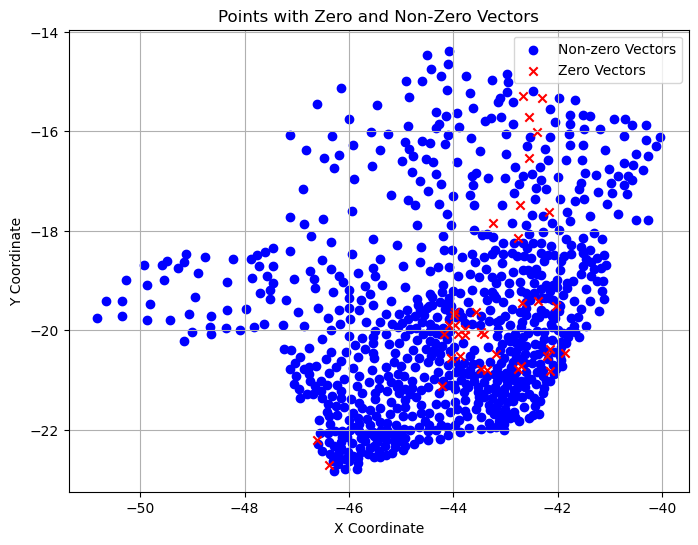

953


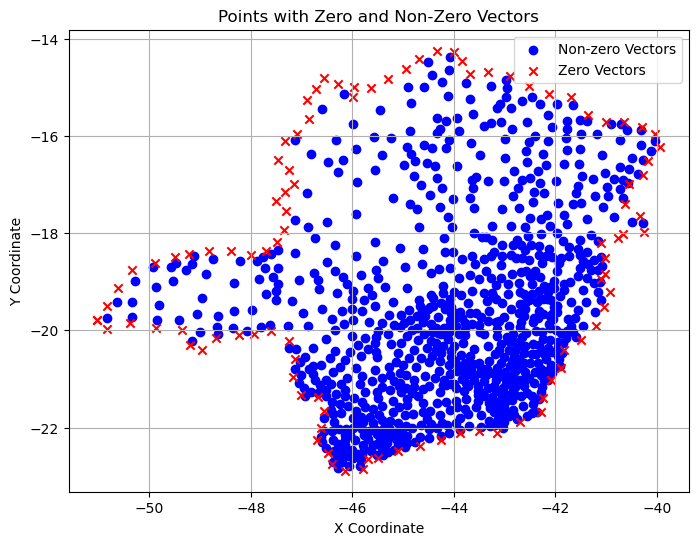

853


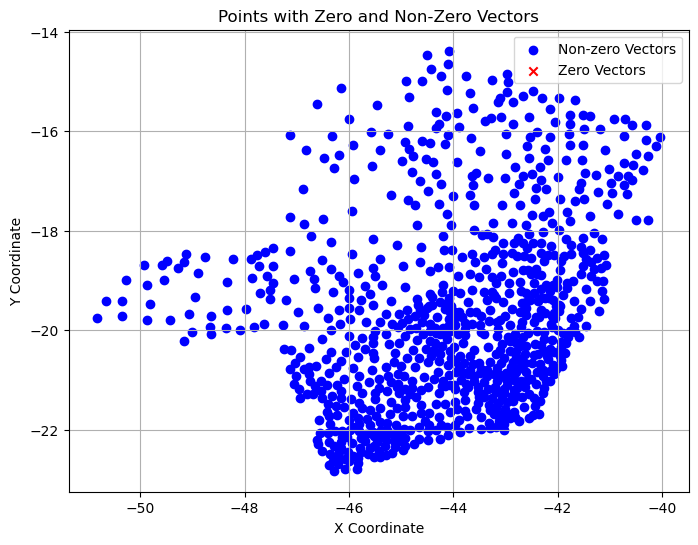

In [50]:
adjacency = copy.deepcopy(adj_matrix)
coordinates = copy.deepcopy(city_coords)


vecs = create_vectors(adjacency, coordinates)
print(len(vecs))

plot_coords_with_zero_vectors(coordinates, vecs)

# add corner points
coords, vecs= add_boundry_points_to_coords_vecs(coordinates, vecs, points_list)

# Step 2: Interpolate missing vectors (excluding the boundry points)
vecs = interpolate_zero_vectors(coords, vecs, points_list)
print(len(vecs))
plot_coords_with_zero_vectors(coords, vecs)
# remove the boundry points

coords, vecs = remove_points_from_coords_vecs(coords, vecs, points_list)
print(len(vecs))
plot_coords_with_zero_vectors(coords, vecs)